In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('sentiment_tweets3.csv', encoding =DATASET_ENCODING)
dataset


,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
cvec = CountVectorizer()
d=cvec.fit(dataset.message)
neg_doc_matrix = cvec.transform(dataset[dataset.label == 1].message)
pos_doc_matrix = cvec.transform(dataset[dataset.label == 0].message)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],
                            columns=cvec.get_feature_names()
                           ).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', 
                         ascending=False
                        ).iloc[:10]

,negative,positive,total
to,1322,2564,3886
the,1162,2656,3818
and,1324,1503,2827
you,710,2018,2728
depression,2505,0,2505
it,675,1512,2187
my,653,1273,1926
of,959,915,1874
is,709,1071,1780
for,465,1215,1680


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

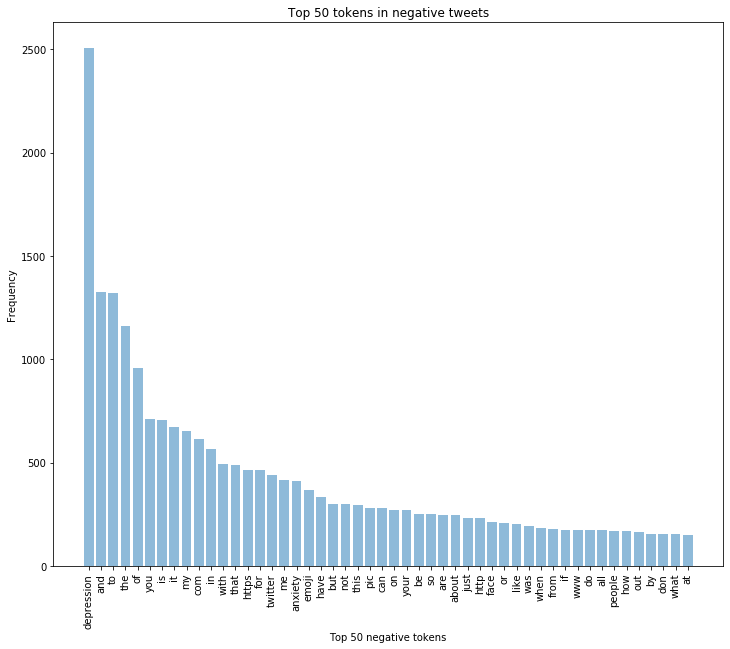

In [5]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, 
        term_freq_df.sort_values(by='negative',ascending=False)       
                                  ['negative'][:50], 
                                  align='center', 
                                  alpha=0.5)
plt.xticks(y_pos, 
           term_freq_df.sort_values(by='negative',ascending=False) 
                                     ['negative']   
                                     [:50].index,
                                     rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

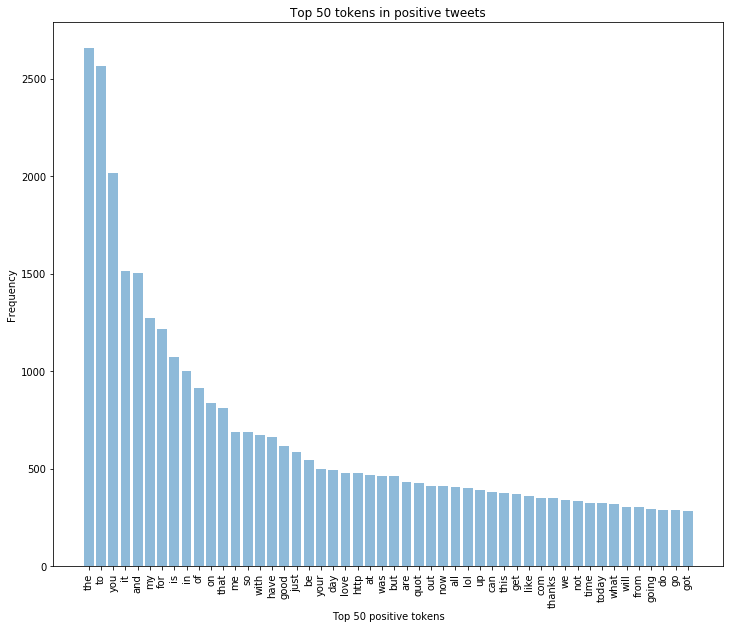

In [6]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, 
        term_freq_df.sort_values(by='positive',ascending=False)       
                                  ['positive'][:50], 
                                  align='center', 
                                  alpha=0.5)
plt.xticks(y_pos, 
           term_freq_df.sort_values(by='positive',ascending=False) 
                                     ['positive']   
                                     [:50].index,
                                     rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

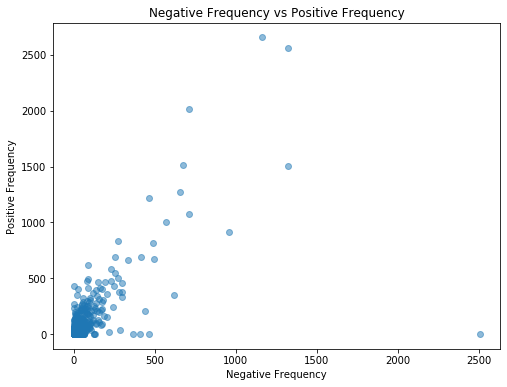

In [7]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", 
                 y="positive",
                 fit_reg=False, 
                 scatter_kws={'alpha':0.5},
                 data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [8]:
dataset['tweet_len'] = dataset['message'].astype(str).apply(len)

Text(0.5, 1.0, 'Tweet Text Length Distribution')

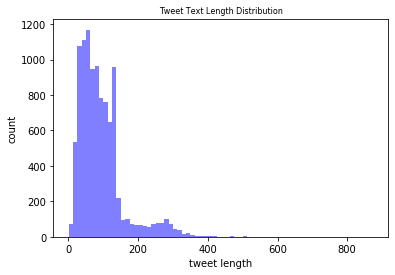

In [9]:
list1=dataset['tweet_len']
bins = 70
plt.hist(list1, bins, alpha = 0.5, color = 'b')
plt.xlabel('tweet length')
plt.ylabel('count')
plt.title('Tweet Text Length Distribution',fontsize=8)

In [10]:
!pip install textblob
from textblob import TextBlob
dataset['polarity'] = dataset['message'].map(lambda text: TextBlob(text).sentiment.polarity)

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

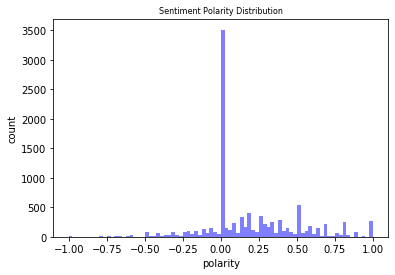

In [11]:
list2=dataset['polarity']
bins = 80
plt.hist(list2, bins, alpha = 0.5, color = 'b')
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('Sentiment Polarity Distribution',fontsize=8)

In [12]:
dataset['word_count'] = dataset['message'].apply(lambda x: len(str(x).split()))

Text(0.5, 1.0, 'Tweet Word Count Distribution')

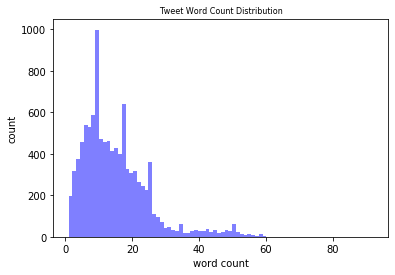

In [13]:
list3=dataset['word_count']
bins = 80
plt.hist(list3, bins, alpha = 0.5, color = 'b')
plt.xlabel('word count')
plt.ylabel('count')
plt.title('Tweet Word Count Distribution',fontsize=8)